In [ ]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00


[['A3', 'A4'], ['A3', 'A1'], ['A2', 'A4', 'A5'], ['A2', 'A1']]


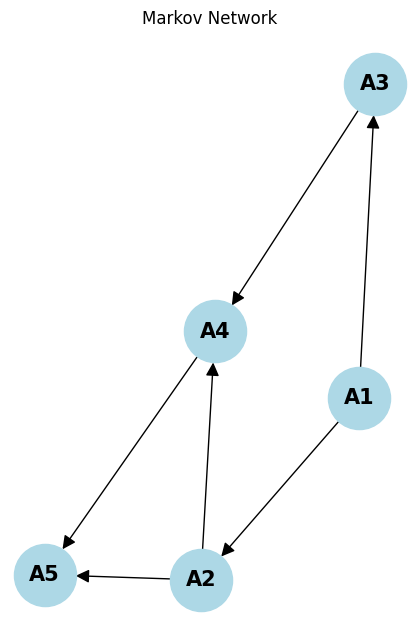

In [ ]:
from pgmpy.models import MarkovNetwork
import networkx as nx
import matplotlib.pyplot as plt

model=MarkovNetwork()

model.add_edges_from([('A1', 'A2'), ('A1', 'A3'), ('A2', 'A4'), ('A2', 'A5'), ('A3', 'A4'), ('A4', 'A5')])

graph = nx.DiGraph()
graph.add_edges_from(model.edges())
plt.figure(figsize=(4, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, arrows=True, node_size=2000, node_color='lightblue', font_size=15, font_weight='bold', arrowsize=20)

cliques=list(nx.find_cliques(model))
print(cliques)
plt.title('Markov Network')
plt.show()




cea mai probabila stare pentru un parametru
ex: in jurul unui nod am rosu-> acel pixel cel mai probabil va fi rosu


b) prob comuna a celor 5 variabile -> + starile de prob maxima pentru ele

In [ ]:
import numpy as np
import itertools

def phi_C(X_C):
    return np.prod(X_C)

variables = ['A1', 'A2', 'A3', 'A4', 'A5']
domain = [0, 1]

all_combinations = list(itertools.product(domain, repeat=len(variables)))

def joint_probability(combination):
    prob = 1
    for clique in cliques:
        clique_vars = [combination[variables.index(var)] for var in clique]
        prob *= phi_C(clique_vars)
    return prob

probabilities = np.array([joint_probability(comb) for comb in all_combinations])

k = np.sum(probabilities)

normalized_probabilities = probabilities / k

for comb,prob in zip(all_combinations,normalized_probabilities):
    print(f"Probabilitatea pentru configuratia {comb}: {prob:.5f}")

Probabilitatea pentru configuratia (0, 0, 0, 0, 0): 0.00000
Probabilitatea pentru configuratia (0, 0, 0, 0, 1): 0.00000
Probabilitatea pentru configuratia (0, 0, 0, 1, 0): 0.00000
Probabilitatea pentru configuratia (0, 0, 0, 1, 1): 0.00000
Probabilitatea pentru configuratia (0, 0, 1, 0, 0): 0.00000
Probabilitatea pentru configuratia (0, 0, 1, 0, 1): 0.00000
Probabilitatea pentru configuratia (0, 0, 1, 1, 0): 0.00000
Probabilitatea pentru configuratia (0, 0, 1, 1, 1): 0.00000
Probabilitatea pentru configuratia (0, 1, 0, 0, 0): 0.00000
Probabilitatea pentru configuratia (0, 1, 0, 0, 1): 0.00000
Probabilitatea pentru configuratia (0, 1, 0, 1, 0): 0.00000
Probabilitatea pentru configuratia (0, 1, 0, 1, 1): 0.00000
Probabilitatea pentru configuratia (0, 1, 1, 0, 0): 0.00000
Probabilitatea pentru configuratia (0, 1, 1, 0, 1): 0.00000
Probabilitatea pentru configuratia (0, 1, 1, 1, 0): 0.00000
Probabilitatea pentru configuratia (0, 1, 1, 1, 1): 0.00000
Probabilitatea pentru configuratia (1, 0

In [ ]:
max_prob = np.max(normalized_probabilities)
max_states = [comb for comb, prob in zip(all_combinations, normalized_probabilities) if prob == max_prob]

print(f"Starea/starile cu probabilitatea maxima: {max_states}, probabilitatea: {max_prob:.5f}")

Starea/starile cu probabilitatea maxima: [(1, 1, 1, 1, 1)], probabilitatea: 1.00000
